In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
diabetes_data=pd.read_csv('health care diabetes.csv')

In [3]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#Get count of outcome column
diabetes_data.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

In [5]:
#checking null value
diabetes_data.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [6]:
diabetes_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
#Now lets create a count (frequency) plot describing the data types and the count of variables. 


In [8]:
diabetes_data['Glucose'].value_counts().head(10)


99     17
100    17
111    14
129    14
125    14
106    14
112    13
108    13
95     13
105    13
Name: Glucose, dtype: int64

In [9]:
diabetes_data['Glucose']


0      148
1       85
2      183
3       89
4      137
      ... 
763    101
764    122
765    121
766    126
767     93
Name: Glucose, Length: 768, dtype: int64

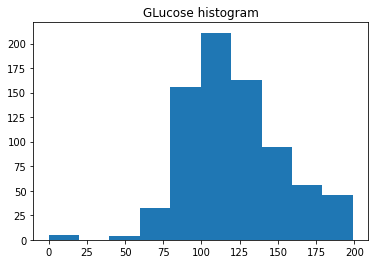

In [17]:
#Drawing histogram for glucose
plt.hist(diabetes_data['Glucose'])
plt.title('GLucose histogram')
plt.show()

In [18]:
#Now will check for another column bloodpressure
diabetes_data['BloodPressure'].value_counts().head(7)

70    57
74    52
78    45
68    45
72    44
64    43
80    40
Name: BloodPressure, dtype: int64

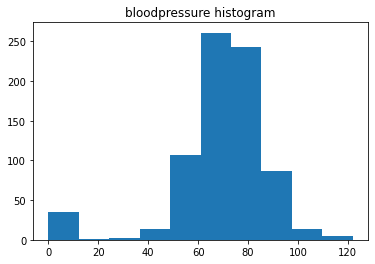

In [19]:
#Drawing histogram for bloodpressure
plt.hist(diabetes_data['BloodPressure'])
plt.title('bloodpressure histogram')
plt.show()

Instead of creating historam one by one. With the help of group by and Outcome we can create all column hisotram

Outcome
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

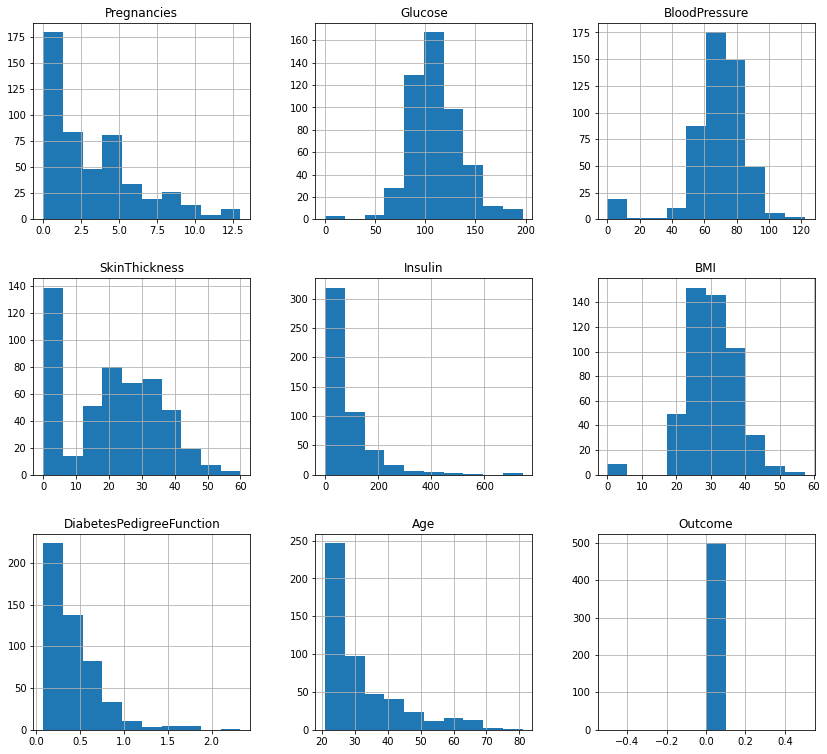

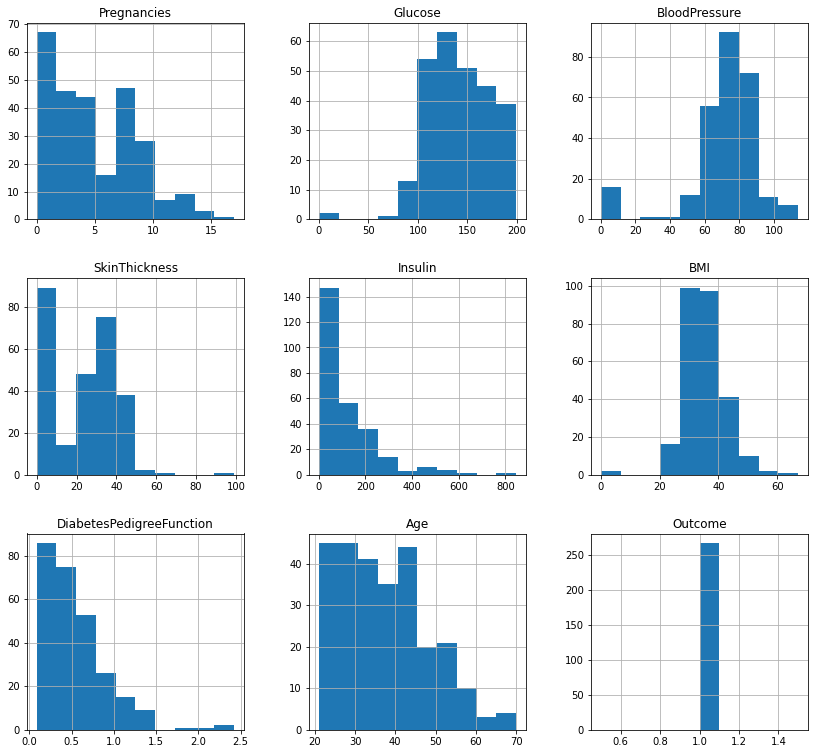

In [20]:
diabetes_data.groupby('Outcome').hist(figsize=(14, 13))

After analyzing the histogram we can identify that there are some outliers in some columns.
For Example:-
- BloodPressure - A living person cannot have a diastolic blood pressure of zero.
- Plasma glucose levels - Zero is invalid number as fasting glucose level would never be as low as zero.
- Skin Fold Thickness - For normal people, skin fold thickness can’t be less than 10 mm better yet zero.
- BMI: Should not be 0 or close to zero unless the person is really underweight which could be life-threatening.
- Insulin: In a rare situation a person can have zero insulin but by observing

In [43]:
#Checking count of zeros in Glucose 
diabetes_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [44]:
diabetes_data_mod = diabetes_data[(diabetes_data.BloodPressure != 0) & (diabetes_data.BMI != 0) & (diabetes_data.Glucose != 0)]
print(diabetes_data_mod.shape)

(724, 9)


In [45]:
#Now we will check the stats of data after removing BloodPressure, BMI and Glucose 0 rows
diabetes_data_mod.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,724.0,3.866022,3.362803,0.000,1.000,3.000,6.0000,17.00
Glucose,724.0,121.882597,30.750030,44.000,99.750,117.000,142.0000,199.00
BloodPressure,724.0,72.400552,12.379870,24.000,64.000,72.000,80.0000,122.00
SkinThickness,724.0,21.443370,15.732756,0.000,0.000,24.000,33.0000,99.00
Insulin,724.0,84.494475,117.016513,0.000,0.000,48.000,130.5000,846.00
BMI,724.0,32.467127,6.888941,18.200,27.500,32.400,36.6000,67.10
DiabetesPedigreeFunction,724.0,0.474765,0.332315,0.078,0.245,0.379,0.6275,2.42
Age,724.0,33.350829,11.765393,21.000,24.000,29.000,41.0000,81.00
Outcome,724.0,0.343923,0.475344,0.000,0.000,0.000,1.0000,1.00


Data Exploration:
1.Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.

2.Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

3. Perform correlation analysis. Visually explore it using a heat map

In [46]:
#Lets create positive variable and store all 1 value Outcome data
Positive = diabetes_data_mod[diabetes_data_mod['Outcome']==1]
Positive.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1


Outcome
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

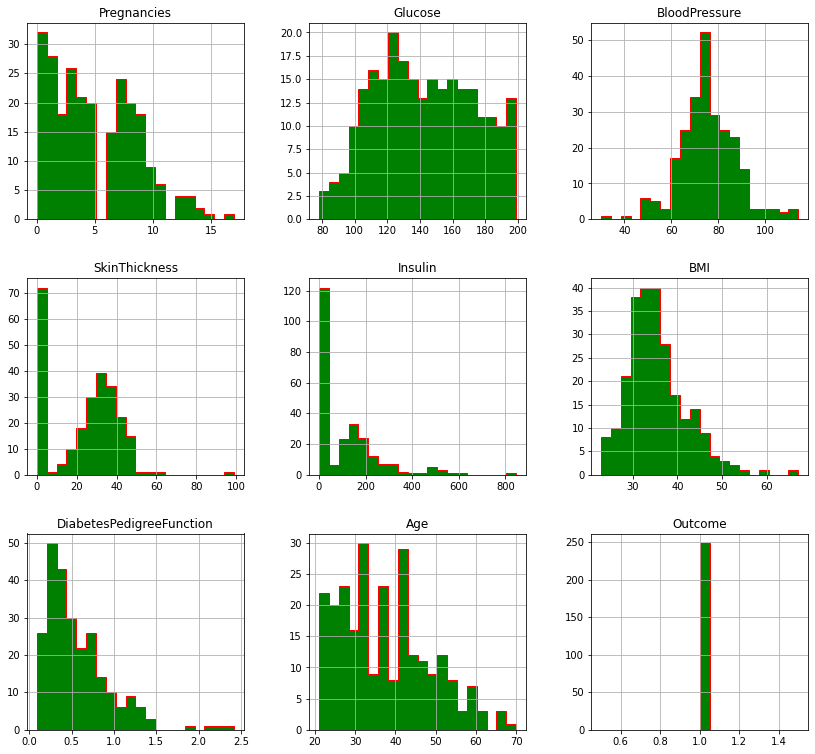

In [47]:
Positive.groupby('Outcome').hist(figsize=(14, 13),histtype='stepfilled',bins=20,color="green",edgecolor="red")

In [48]:
BloodPressure = Positive['BloodPressure']
Glucose = Positive['Glucose']
SkinThickness = Positive['SkinThickness']
Insulin = Positive['Insulin']
BMI = Positive['BMI']

<AxesSubplot: xlabel='BloodPressure', ylabel='Glucose'>

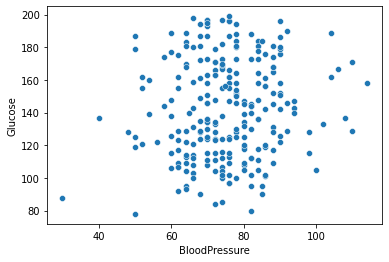

In [52]:
sns.scatterplot(Positive['BloodPressure'],Positive['Glucose'])

In [53]:
#Creating scatter plot for negative outcome
Negative = diabetes_data_mod[diabetes_data_mod['Outcome']==0]

<AxesSubplot: xlabel='BloodPressure', ylabel='Glucose'>

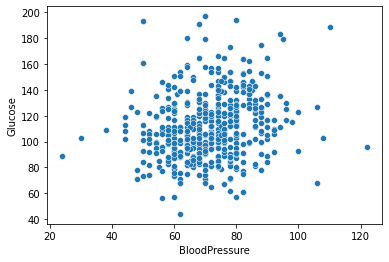

In [55]:
sns.scatterplot(Negative['BloodPressure'],Negative['Glucose'])

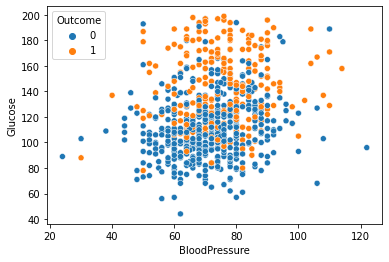

In [56]:
g =sns.scatterplot(x= "BloodPressure" ,y= "Glucose",
              hue="Outcome",
              data=diabetes_data_mod);

As you can compare postive & negative scatter plot with sns scatter plot all the value is matching, so now I will create common scatter plot for both outcome.

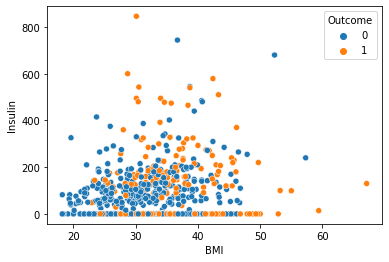

In [58]:
B =sns.scatterplot(x= "BMI" ,y= "Insulin",
              hue="Outcome",
              data=diabetes_data_mod);

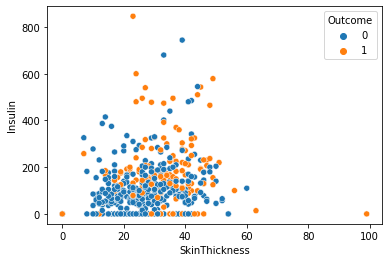

In [59]:
S =sns.scatterplot(x= "SkinThickness" ,y= "Insulin",
              hue="Outcome",
              data=diabetes_data_mod);

In [60]:
### correlation matrix
diabetes_data_mod.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.134915,0.209668,-0.095683,-0.080059,0.012342,-0.025996,0.557066,0.224417
Glucose,0.134915,1.000000,0.223331,0.074381,0.337896,0.223276,0.136630,0.263560,0.488384
BloodPressure,0.209668,0.223331,1.000000,0.011777,-0.046856,0.287403,-0.000075,0.324897,0.166703
SkinThickness,-0.095683,0.074381,0.011777,1.000000,0.420874,0.401528,0.176253,-0.128908,0.092030
Insulin,-0.080059,0.337896,-0.046856,0.420874,1.000000,0.191831,0.182656,-0.049412,0.145488
BMI,0.012342,0.223276,0.287403,0.401528,0.191831,1.000000,0.154858,0.020835,0.299375
DiabetesPedigreeFunction,-0.025996,0.136630,-0.000075,0.176253,0.182656,0.154858,1.000000,0.023098,0.184947
Age,0.557066,0.263560,0.324897,-0.128908,-0.049412,0.020835,0.023098,1.000000,0.245741
Outcome,0.224417,0.488384,0.166703,0.092030,0.145488,0.299375,0.184947,0.245741,1.000000


<AxesSubplot: >

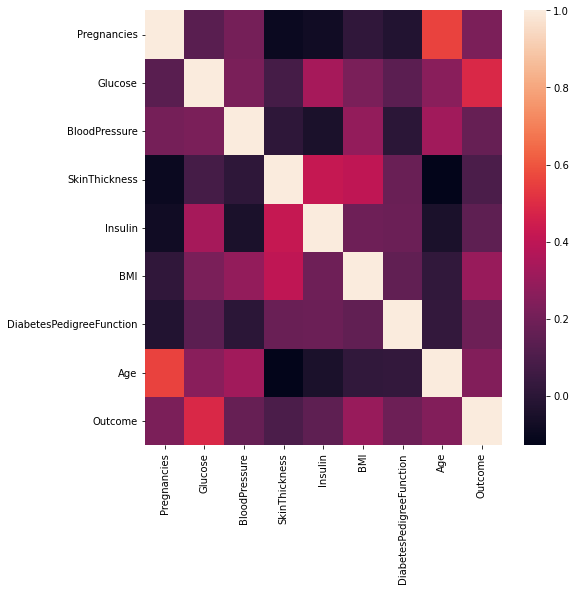

In [61]:
### create correlation heat map
plt.subplots(figsize=(8,8))
sns.heatmap(diabetes_data_mod.corr())

<AxesSubplot: >

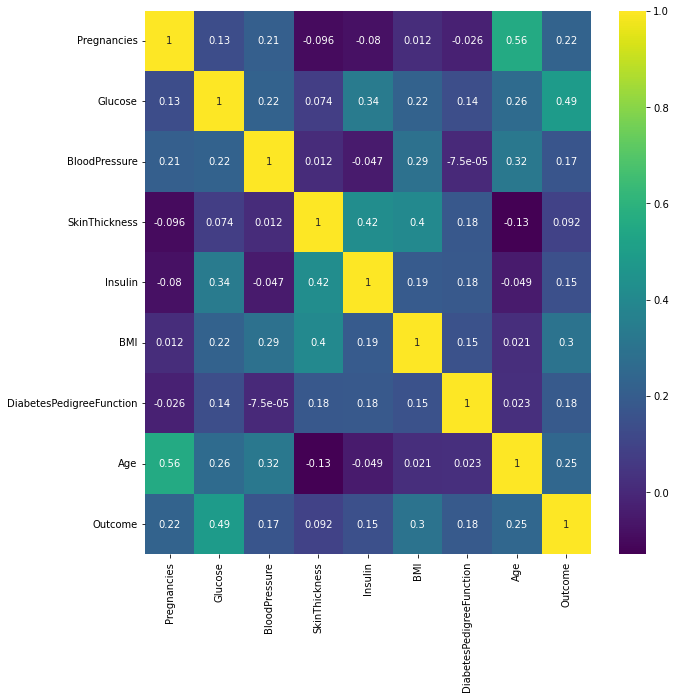

In [62]:
### gives correlation value
plt.subplots(figsize=(10,10))
sns.heatmap(diabetes_data_mod.corr(),annot=True,cmap='viridis')

In [63]:
# Logistic Regreation and model building

In [64]:
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = diabetes_data_mod[feature_names]
y = diabetes_data_mod.Outcome

In [65]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [66]:
#Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state =10)

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [68]:
#LR Model
model_LR = LogisticRegression(solver='liblinear')
model_LR.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [69]:
#now check LR model score and accuracy score 

print("LogisticRegression Score :{}".format(model_LR.score(X_train,y_train)))
y_pred = model_LR.predict(X_test)
scores = (accuracy_score(y_test, y_pred))
print("LogisticRegression Accuracy Score :{}".format(scores))

LogisticRegression Score :0.770293609671848
LogisticRegression Accuracy Score :0.8


In [70]:
accuracyScores = []
modelScores = []
models = []
names = []
#Store algorithm into array to get score and accuracy
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('SVC', SVC()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))

In [71]:
#We fit each model in a loop and calculate the accuracy of the respective model using the “accuracy_score”
for name, model in models:
    model.fit(X_train, y_train)
    modelScores.append(model.score(X_train,y_train))
    y_pred = model.predict(X_test)
    accuracyScores.append(accuracy_score(y_test, y_pred))
    names.append(name)
    
tr_split_data = pd.DataFrame({'Name': names, 'Score': modelScores,'Accuracy Score': accuracyScores})
print(tr_split_data)

  Name     Score  Accuracy Score
0   LR  0.770294        0.800000
1  SVC  0.768566        0.793103
2  KNN  0.804836        0.731034
3   DT  1.000000        0.717241
4  GNB  0.751295        0.793103
5   RF  1.000000        0.751724
6   GB  0.929188        0.758621


Now lets perform K-Fold Cross Validation with Scikit Learn

In [73]:
names = []
scores = []
for name, model in models:
    kfold = KFold(n_splits=10) 
    score = cross_val_score(model, X, y, cv=kfold, scoring='accuracy').mean()
    names.append(name)
    scores.append(score)
k_fold_cross_val_score = pd.DataFrame({'Name': names, 'Score': scores})
print(k_fold_cross_val_score)

  Name     Score
0   LR  0.766781
1  SVC  0.758581
2  KNN  0.719787
3   DT  0.692104
4  GNB  0.757021
5   RF  0.764003
6   GB  0.777816


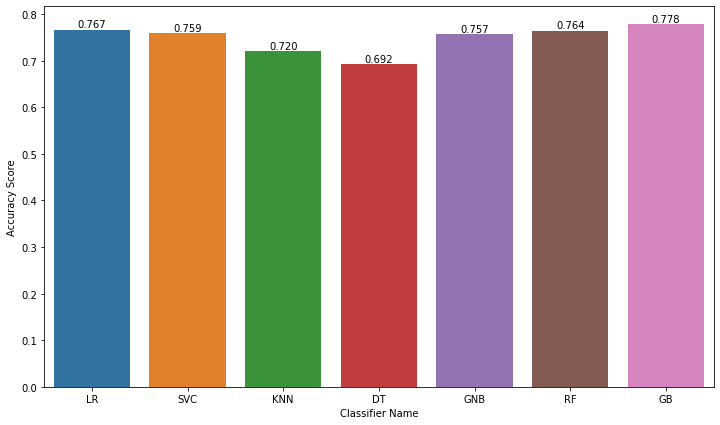

In [74]:
plt.subplots(figsize=(12,7))
axis = sns.barplot(x = 'Name', y = 'Score', data = k_fold_cross_val_score)
axis.set(xlabel='Classifier Name', ylabel='Accuracy Score')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.3f}'.format(height), ha="center")
    
plt.show()